In [30]:
import numpy as np
from qiskit import BasicAer, QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute, transpile
from numpy import pi
from qiskit.circuit.library import C3XGate
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

qreg_q = QuantumRegister(7, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)


## TABELA VERDADE F1

- 000 - 1
- 001 - 2
- 010 - 4
- 011 - 1
- 100 - 2
- 101 - 4
- 110 - 1
- 111 - 2


In [31]:
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])

In [32]:
def f1():
    circuit.x(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.x(qreg_q[2])
    circuit.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
    circuit.x(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.x(qreg_q[2])
    circuit.x(qreg_q[2])
    circuit.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
    circuit.x(qreg_q[2])
    circuit.barrier(qreg_q[0])
    circuit.x(qreg_q[0])
    circuit.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
    circuit.x(qreg_q[0])
    circuit.barrier(qreg_q[1])
    circuit.barrier(qreg_q[2])
    circuit.x(qreg_q[2])
    circuit.x(qreg_q[1])
    circuit.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[4]])
    circuit.x(qreg_q[1])
    circuit.x(qreg_q[2])
    circuit.barrier(qreg_q[0])
    circuit.x(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[4]])
    circuit.x(qreg_q[1])
    circuit.x(qreg_q[0])
    circuit.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[4]])
    circuit.x(qreg_q[2])
    circuit.x(qreg_q[0])
    circuit.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[5]])
    circuit.x(qreg_q[2])
    circuit.x(qreg_q[0])
    circuit.barrier(qreg_q[1])
    circuit.x(qreg_q[1])
    circuit.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[5]])
    circuit.x(qreg_q[1])

In [33]:
f1() # achar 1

circuit.measure(qreg_q[3], creg_c[0])
circuit.measure(qreg_q[4], creg_c[1])
circuit.measure(qreg_q[5], creg_c[2])

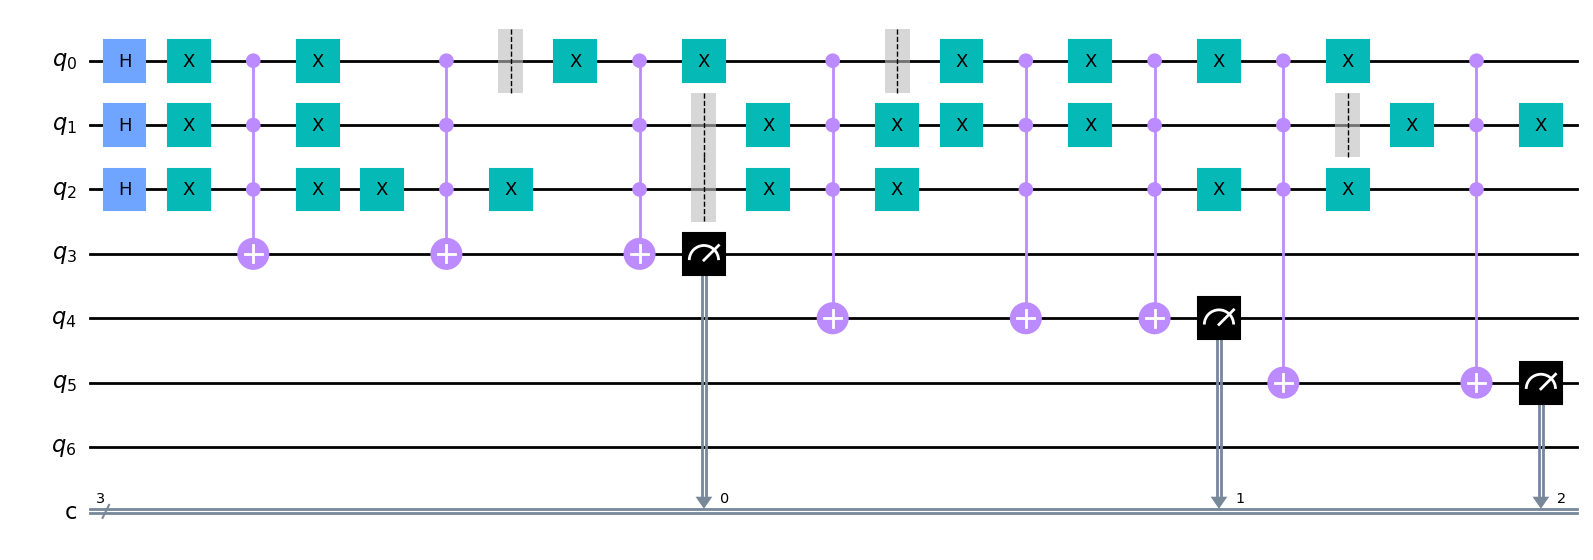

In [34]:
circuit.draw(output='mpl')

In [35]:
# Oraculo 1 2 4
# achar 1

### 000 001 110
# def oraculo1():
    

{'100': 226, '010': 397, '001': 377}


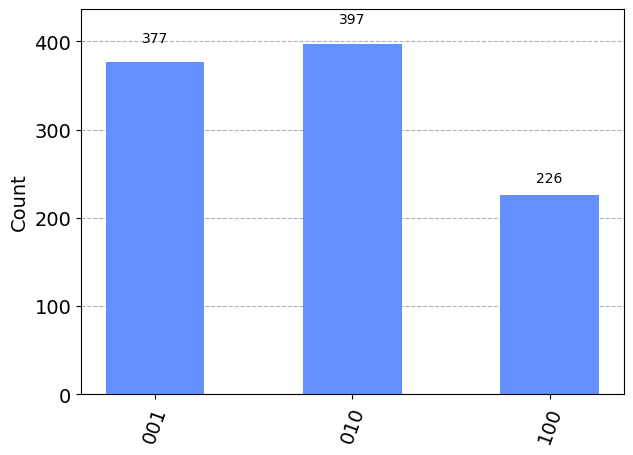

In [36]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print(counts)
circuit.draw('mpl')
plot_histogram(counts)